Task 1:
1. Download the monthly natural gas price data.
2. Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September   2024.
3. Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
4. Your code should take a date as input and return a price estimate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
#reading the data from the csv file
nat_gas = pd.read_csv("Nat_Gas.csv")
nat_gas.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [3]:
#checking for null or missing values
nat_gas.isna().sum()

Dates     0
Prices    0
dtype: int64

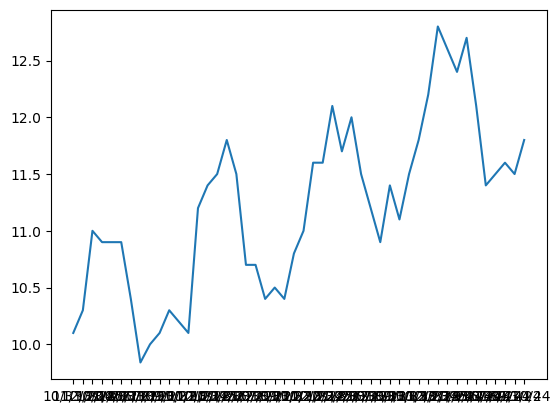

In [4]:
#visualizing the gas prices
plt.plot(nat_gas["Dates"], nat_gas["Prices"])

In [5]:
#seeing the trend in december prices for each year to better analyse the trend
nat_gas["Dates"] = pd.to_datetime(nat_gas["Dates"])
nat_gas["Year"] = nat_gas["Dates"].dt.year
nat_gas["Month"] = nat_gas["Dates"].dt.month

natgas_dec = nat_gas[nat_gas["Month"] == 12]
natgas_dec
#this shows that the prices keep on increasing every year for each month

C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\3376096739.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas["Dates"] = pd.to_datetime(nat_gas["Dates"])


,Dates,Prices,Year,Month
2,2020-12-31,11.0,2020,12
14,2021-12-31,11.4,2021,12
26,2022-12-31,11.6,2022,12
38,2023-12-31,12.8,2023,12


In [6]:
#using linear regression model to extrapolate it to the the future
X = np.array(nat_gas[nat_gas["Month"] == 1]["Year"]).reshape(-1, 1) #scaling the data to make the parameters fit
y = np.array(nat_gas[nat_gas["Month"] == 1]["Prices"])

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

In [7]:
round(float(reg.predict([[2025]])), 2) #predicting the prices for january 2025

C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\2769399802.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(reg.predict([[2025]])), 2) #predicting the prices for january 2025


13.2

In [8]:
#function to predict prices for each month of next year
def nxtyr_price(next_year):
    price_list= []
    for i in np.arange(12):
        X = np.array(nat_gas[nat_gas["Month"] == 1+i]["Year"]).reshape(-1, 1) #scaling the data to make the parameters fit
        y = np.array(nat_gas[nat_gas["Month"] == 1+i]["Prices"])
        reg = LinearRegression().fit(X,y)
        price = round(float(reg.predict([[next_year]])), 2)
        dates = nat_gas["Dates"]
        price_list.append(price)
    return price_list

In [9]:
price_26 = nxtyr_price(2026)
print(price_26)

[13.77, 13.24, 13.84, 13.24, 12.6, 12.45, 12.79, 12.33, 13.0, 13.45, 14.07, 14.22]


C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\2947923935.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price = round(float(reg.predict([[next_year]])), 2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\2947923935.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price = round(float(reg.predict([[next_year]])), 2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9756\2947923935.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price = round(float(reg.predict(

In [10]:
#function to get the last date of each month for a future year
from datetime import timedelta as td
from datetime import datetime

def last_month(year):
    dates_arr = []
    curr_date = datetime(year, 12, 31) #starting from last day of the year
    while curr_date.year == year:
        dates_arr.append(curr_date.strftime("%Y-%m-%d"))
        month = curr_date.month
        year = curr_date.year

        curr_date = curr_date.replace(year = year, month = month, day = 1)
        curr_date -= td(days = 1)
    return dates_arr[::-1]


In [11]:
dates_2025 = last_month(2025)
dates_2025

['2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [12]:
#creating a dataframe to store the predicted prices along with predicted year and month
future_prices25 = pd.DataFrame({"Dates" : dates_2025, "Prices" : price_26})
future_prices25["Dates"] = pd.to_datetime(future_prices25["Dates"])
future_prices25["Year"] = future_prices25["Dates"].dt.year
future_prices25["Month"] = future_prices25["Dates"].dt.month
future_prices25


,Dates,Prices,Year,Month
0,2025-01-31,13.77,2025,1
1,2025-02-28,13.24,2025,2
2,2025-03-31,13.84,2025,3
3,2025-04-30,13.24,2025,4
4,2025-05-31,12.60,2025,5
5,2025-06-30,12.45,2025,6
6,2025-07-31,12.79,2025,7
7,2025-08-31,12.33,2025,8
8,2025-09-30,13.00,2025,9
9,2025-10-31,13.45,2025,10


In [13]:
#concatenating the previous prices and predicted proces into one dataframe
all_df = pd.concat([nat_gas, future_prices25], ignore_index = True)
all_df

,Dates,Prices,Year,Month
0,2020-10-31,10.10,2020,10
1,2020-11-30,10.30,2020,11
2,2020-12-31,11.00,2020,12
3,2021-01-31,10.90,2021,1
4,2021-02-28,10.90,2021,2
5,2021-03-31,10.90,2021,3
6,2021-04-30,10.40,2021,4
7,2021-05-31,9.84,2021,5
8,2021-06-30,10.00,2021,6
9,2021-07-31,10.10,2021,7


In [14]:
#creating a function which takes in month and year and extracts the prices from dataframe returns it
def get_price(month, year):
    print(all_df[(all_df["Year"] == year) & (all_df["Month"] == month)]["Prices"])

In [15]:
get_price(9, 2025)

56    13.0
Name: Prices, dtype: float64


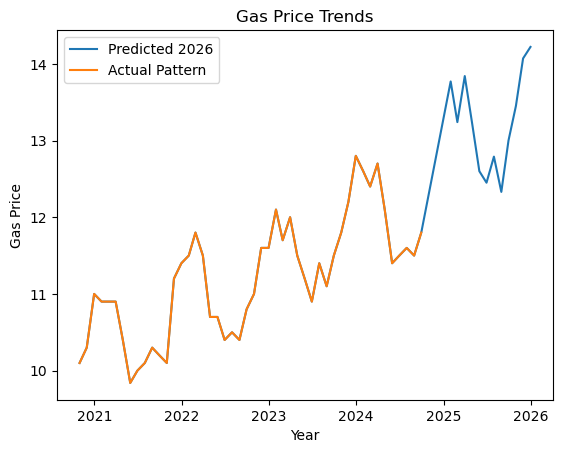

In [16]:
#visualizing the actual prices and predicted prices
plt.plot(all_df["Dates"], all_df["Prices"], label = "Predicted 2026")
plt.plot(nat_gas["Dates"], nat_gas["Prices"], label = "Actual Pattern")
plt.ylabel("Gas Price")
plt.xlabel("Year")
plt.title("Gas Price Trends")
plt.legend()

Task 2:

Write a function that is able to use the data you created previously to price the contract. The client may want to choose multiple dates to inject and withdraw a set amount of gas, so your approach should generalize the explanation from before. Consider all the cash flows involved in the product. The input parameters that should be taken into account for pricing are:

1. Injection dates. 
2. Withdrawal dates.
3. The prices at which the commodity can be purchased/sold on those dates.
4. The rate at which the gas can be injected/withdrawn.
5. The maximum volume that can be stored.
6. Storage costs.

Write a function that takes these inputs and gives back the value of the contract. You can assume there is no transport delay and that interest rates are zero. Market holidays, weekends, and bank holidays need not be accounted for. Test your code by selecting a few sample inputs.

In [26]:

def predict_price(date):
    price = all_df[all_df["Dates"] == date]["Prices"].values
    if price.size == 1:
        return price.item()
    else:
        raise ValueError(f"Expected exactly one price for date {date}, but got {price.size}")

def contract_value(injection_dates, withdrawal_dates, commodity_rate, injection_withdrawal_prices, max_vol, storage_costs):
    profit = 0

    for i in range(len(injection_dates)):
        injection_price = predict_price(injection_dates[i])
        print("injection_price:", injection_price)
        withdrawal_price = predict_price(withdrawal_dates[i])
        print("withdrawal_price:", withdrawal_price)

        months_in_store = round((pd.to_datetime(withdrawal_dates[i]) - pd.to_datetime(injection_dates[i])).days / 30)
        print("months in store:", months_in_store)
        total_inject_vol = min(months_in_store * commodity_rate, max_vol)
        print("total_injected_volume:", total_inject_vol)

        injection_cost = (total_inject_vol * injection_price) - (total_inject_vol / 1000000 * injection_withdrawal_prices)
        print("injection_cost:", injection_cost)
        sales_revenue = total_inject_vol * withdrawal_price - (total_inject_vol / 1000000 * injection_withdrawal_prices)
        print("sales_revenue:", sales_revenue)
        strg_cst = months_in_store * storage_costs
        print("storage_cost:", strg_cst)

        profit += (sales_revenue - injection_cost - strg_cst)

    return profit

# Sample testing
injection_dates = ["9/30/2024"]
withdrawal_dates = ["2/28/2025"]
commodity_rate = 1000000
injection_withdrawal_prices = 10000
max_vol = 50000000
storage_costs = 100000

profit = contract_value(injection_dates, withdrawal_dates, commodity_rate, injection_withdrawal_prices, max_vol, storage_costs)
print("profit:", profit)


injection_price: 11.8
withdrawal_price: 13.24
months in store: 5
total_injected_volume: 5000000
injection_cost: 58950000.0
sales_revenue: 66150000.0
storage_cost: 500000
profit: 6700000.0


Task 3:
Train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

1. You should produce a function that can take in the properties of a loan and output the expected loss.
2. You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

I will be using Logistic Regression and Random Forest and comapring both of them

In [27]:
loan = pd.read_csv("Task 3 and 4_Loan_Data.csv")
loan

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [28]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

#splitting dataset into features and target
b = loan.drop(["default", "customer_id"], axis = 1)
c = loan["default"]

#scaling the features
scale = StandardScaler()
b_scaled = scale.fit_transform(b)

#splitting data into training and testing sets
b_train, b_test, c_train, c_test = train_test_split(b_scaled, c, test_size = 0.2, random_state= 45)

log_reg = LogisticRegression()
log_reg.fit(b_train, c_train)

prob = log_reg.predict_proba(b_test)[:, 1]
prob


array([1.39416645e-11, 9.63886489e-01, 9.99999316e-01, ...,
       1.07483775e-08, 4.48640826e-10, 4.45413902e-09])

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_pred = log_reg.predict(b_test)

conf_mat = confusion_matrix(c_test, c_pred)
print(conf_mat)

[[1618    0]
 [   7  375]]


In [44]:
#getting feature names from Dataframe
feature_names = b.columns

#getting coefficients from log_reg model
coeff = log_reg.coef_[0]

#df to hold feature_names and their correspoding coeff
co = pd.DataFrame({"feature" : feature_names, "coefficients" : coeff})

co.sort_values(by = "coefficients", ascending=False)

,feature,coefficients
0,credit_lines_outstanding,8.697683
2,total_debt_outstanding,3.903066
1,loan_amt_outstanding,0.103892
5,fico_score,-1.218273
3,income,-2.449553
4,years_employed,-2.965631


In [46]:
#expected loss function
from sklearn.preprocessing import StandardScaler
def expt_loss(model, scale, features, recovery_rate = 0.1):
    features_scaled = scale.transform([features])
    prob_default = model.predict_proba(features_scaled)[:, 1][0]
    LGD = 1- recovery_rate
    EAD = features[1]
    expected_loss = prob_default * EAD * LGD
    return expected_loss

#testing
borr_features = [5, 1958.928726, 8228.752520, 26648.43525, 2, 572]
borr_expt_loss = expt_loss(log_reg, scale, borr_features)
borr_expt_loss

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1763.0354977620254

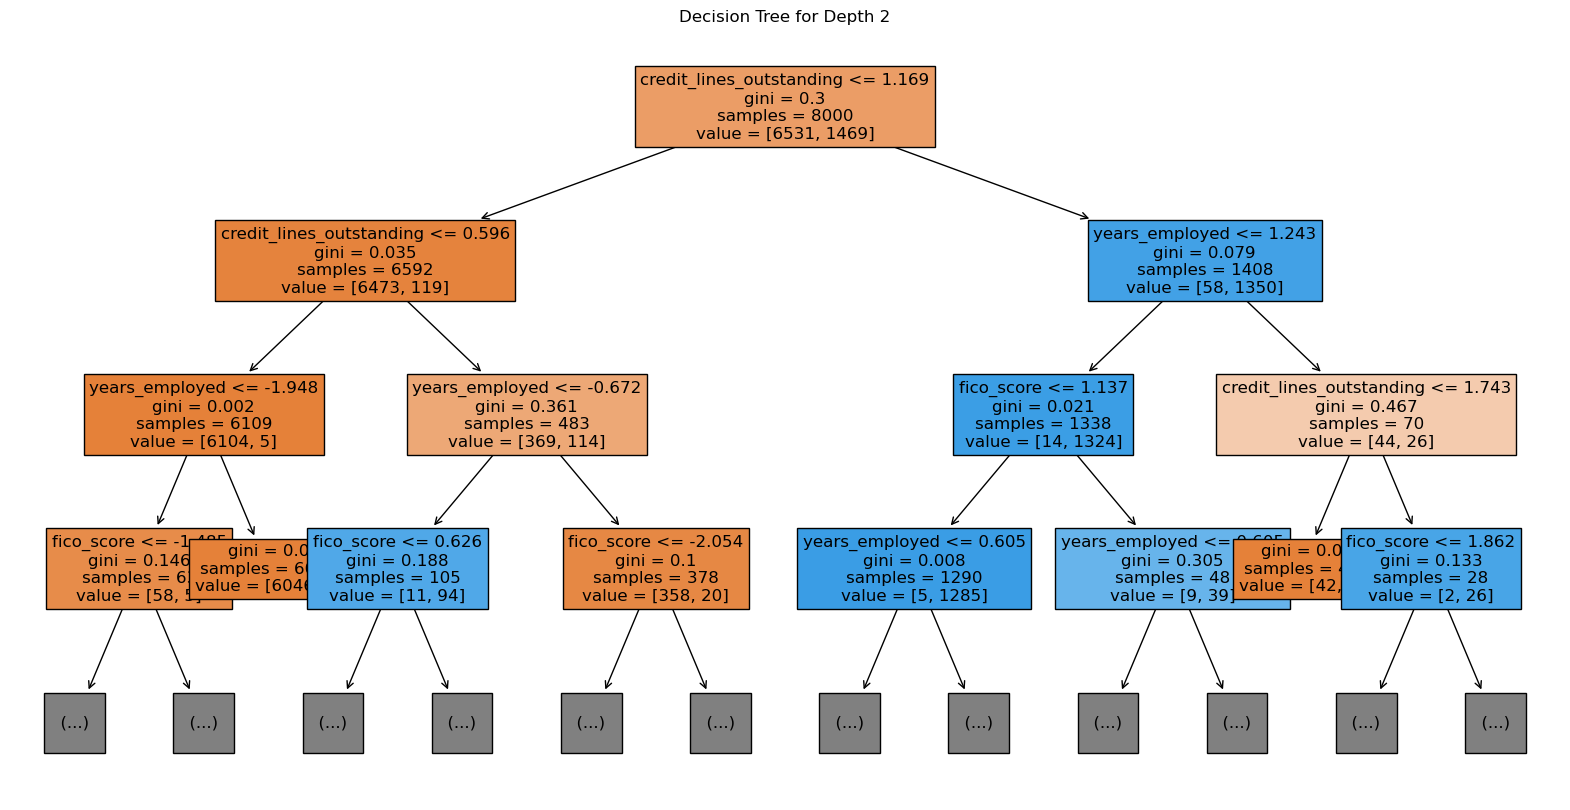

In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier(random_state= 45)

decision_tree.fit(b_train, c_train)

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_names, max_depth=3, fontsize=12)
plt.title("Decision Tree for Depth 2")
plt.show()

In [48]:
n_nodes = decision_tree.tree_.node_count
child_left = decision_tree.tree_.children_left
child_right = decision_tree.tree_.children_right
feature = decision_tree.tree_.feature
thresh = decision_tree.tree_.threshold

leaf_id = [node_id for node_id, left_child in enumerate(child_left) if left_child == -1]

leaf_samples = []

for i in leaf_id:
    samples = decision_tree.tree_.value[i, 0]
    leaf_samples.append(samples)

leaf_samples



[array([3., 0.]),
 array([0., 5.]),
 array([55.,  0.]),
 array([6046.,    0.]),
 array([ 0., 87.]),
 array([1., 0.]),
 array([0., 4.]),
 array([0., 1.]),
 array([3., 0.]),
 array([0., 1.]),
 array([7., 0.]),
 array([0., 1.]),
 array([0., 8.]),
 array([3., 0.]),
 array([1., 0.]),
 array([0., 2.]),
 array([0., 3.]),
 array([13.,  0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([8., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([37.,  0.]),
 array([0., 1.]),
 array([215.,   0.]),
 array([0., 1.]),
 array([63.,  0.]),
 array([0., 1.]),
 array([16.,  0.]),
 array([0., 1.]),
 array([   0., 1187.]),
 array([ 0., 16.]),
 array([0., 1.]),
 array([3., 0.]),
 array([ 0., 79.]),
 array([0., 2.]),
 array([2., 0.]),
 array([ 0., 35.]),
 array([9., 0.]),
 array([0., 4.]),
 array([42.,  0.]),
 array([ 0., 26.]),
 array([1., 0.]),
 array([1., 0.])]

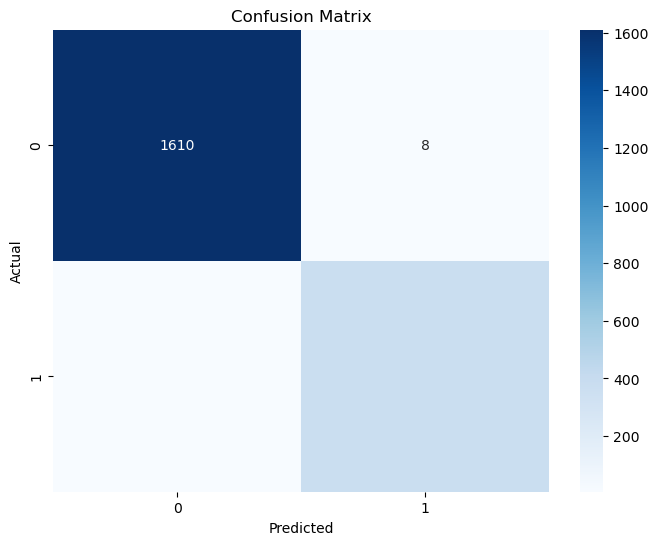

In [50]:
c_pred2 = decision_tree.predict(b_test)
conf_mat2 = confusion_matrix(c_test, c_pred2)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [51]:
borr_features = [5, 1958.928726, 8228.752520, 26648.43525, 2, 572]
borr_expt_loss_dt = expt_loss(decision_tree, scale, borr_features)
borr_expt_loss_dt

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1763.0358534000002